In [2]:
import mysql.connector

In [3]:
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="123456",
    database="banking"
)

In [4]:
conn.is_connected()

True

In [5]:
query = "SELECT * FROM banking.banking_clients"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_sql(query,conn)

C:\Users\atewa\AppData\Local\Temp\ipykernel_10816\785092515.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [8]:
df.head()

,ClientID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,...,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,Male,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,Male,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,Female,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,Male,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,Female,5


In [9]:
df.dtypes

ClientID                     object
Name                         object
Age                           int64
Location_ID                   int64
Joined_Bank                  object
Banking_Contact              object
Nationality                  object
Occupation                   object
Fee_Structure                object
Loyalty_Classification       object
Estimated_Income            float64
Superannuation_Savings      float64
credit_cards                  int64
Credit_Card_Balance         float64
Bank_Loans                  float64
Bank_Deposits               float64
Checking_Accounts           float64
Saving_Accounts             float64
Foreign_Currency_Account    float64
Business_Lending            float64
Properties_Owned              int64
Risk_Weighting                int64
BRId                          int64
GenderId                     object
IAId                          int64
dtype: object

In [10]:
df['Joined_Bank'] = pd.to_datetime(df['Joined_Bank']).dt.date

In [11]:
df['Joined_Bank']

0       2019-05-06
1       2001-12-10
2       2010-01-25
3       2019-03-28
4       2012-07-20
           ...    
2995    2014-10-09
2996    2009-02-05
2997    2009-12-29
2998    2006-02-13
2999    2005-12-08
Name: Joined_Bank, Length: 3000, dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientID                  3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location_ID               3000 non-null   int64  
 4   Joined_Bank               3000 non-null   object 
 5   Banking_Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee_Structure             3000 non-null   object 
 9   Loyalty_Classification    3000 non-null   object 
 10  Estimated_Income          3000 non-null   float64
 11  Superannuation_Savings    3000 non-null   float64
 12  credit_cards              3000 non-null   int64  
 13  Credit_Card_Balance       3000 non-null   float64
 14  Bank_Loa

In [13]:
df.describe()

,Age,Location_ID,Estimated_Income,Superannuation_Savings,credit_cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,22.000000


### Insights
1. Around 75% clients are under 69yr of age.
2. Also 75% of clients have less than 250000 of estimated income
3. 75% clients have less than 35464.74 superannuation_savings

In [14]:
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income_Band'] = pd.cut(df['Estimated_Income'],bins = bins, labels=labels, right = False)

<Axes: ylabel='Income_Band'>

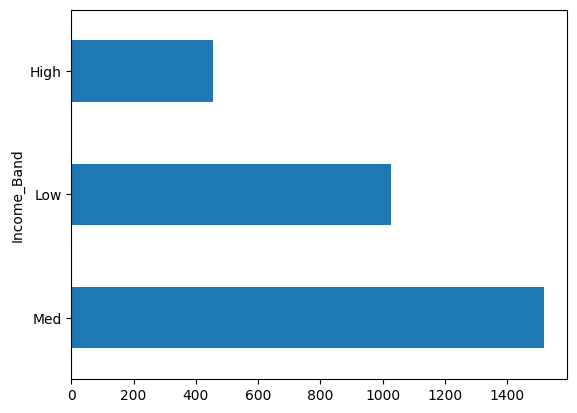

In [15]:
df['Income_Band'].value_counts().plot(kind='barh')

In [16]:
ctg_cols = df[["BRId", "GenderId", "IAId", "credit_cards", "Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification", "Properties_Owned", "Risk_Weighting", "Income_Band"]].columns

for col in ctg_cols:
    print(f'Value Counts for {col}:')
    display(df[col].value_counts())

Value Counts for BRId:


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value Counts for GenderId:


GenderId
Female    1512
Male      1488
Name: count, dtype: int64

Value Counts for IAId:


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value Counts for credit_cards:


credit_cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value Counts for Nationality:


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value Counts for Occupation:


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value Counts for Fee_Structure:


Fee_Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value Counts for Loyalty_Classification:


Loyalty_Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value Counts for Properties_Owned:


Properties_Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value Counts for Risk_Weighting:


Risk_Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value Counts for Income_Band:


Income_Band
Med     1517
Low     1027
High     456
Name: count, dtype: int64

### Univariate Analysis

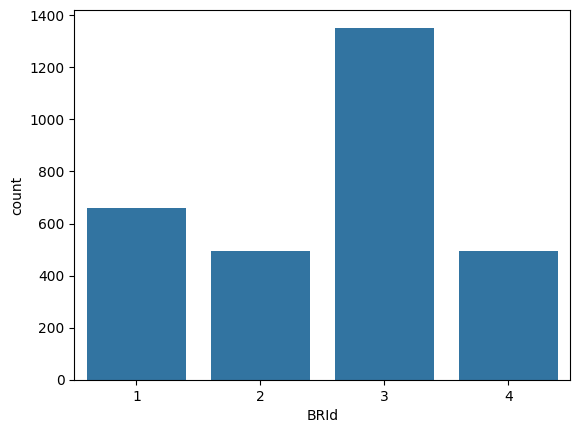

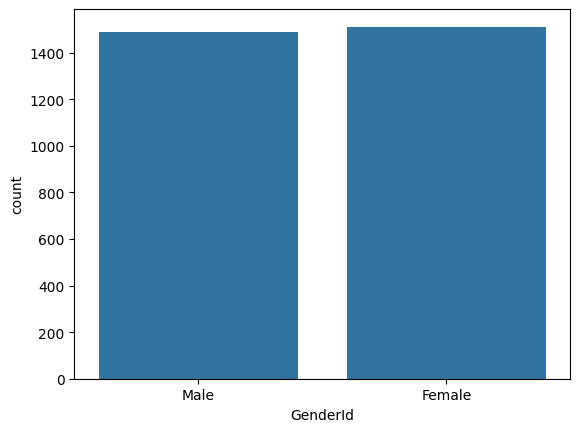

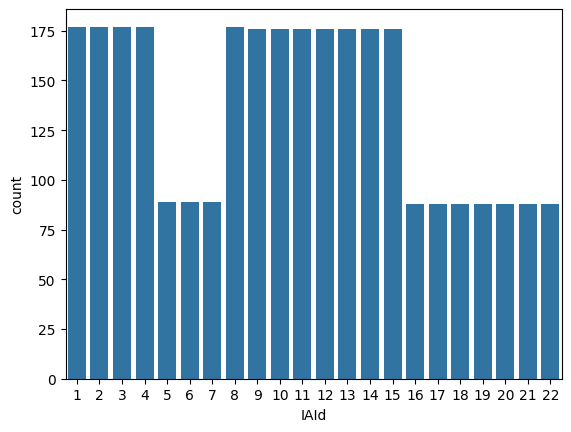

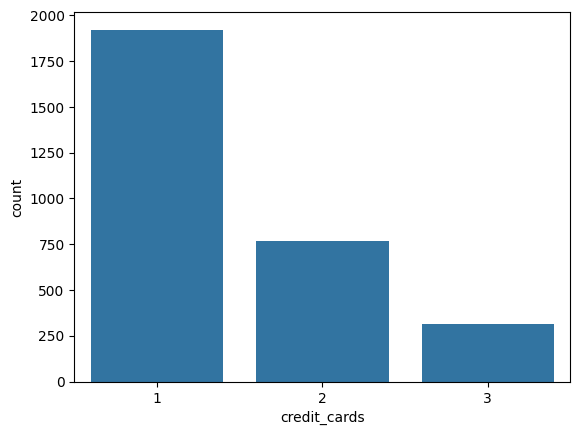

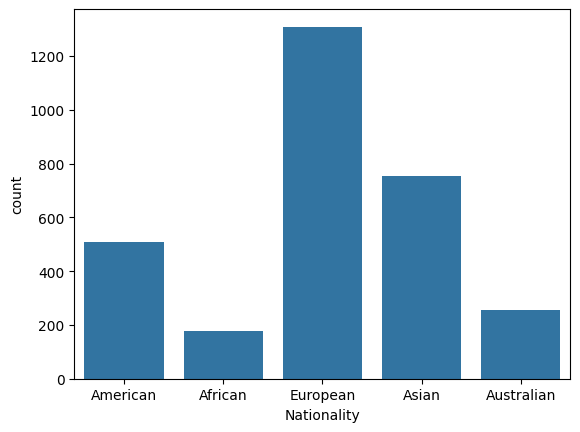

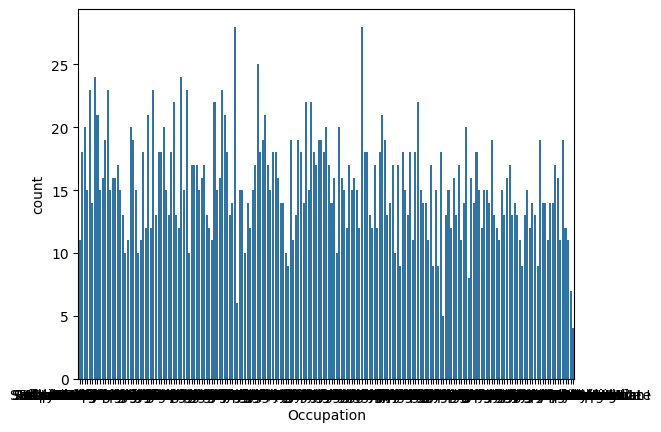

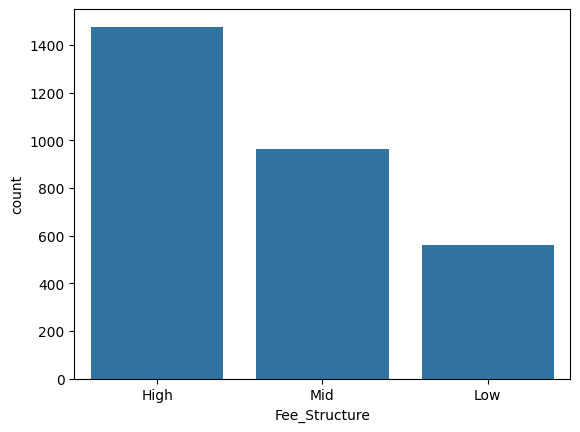

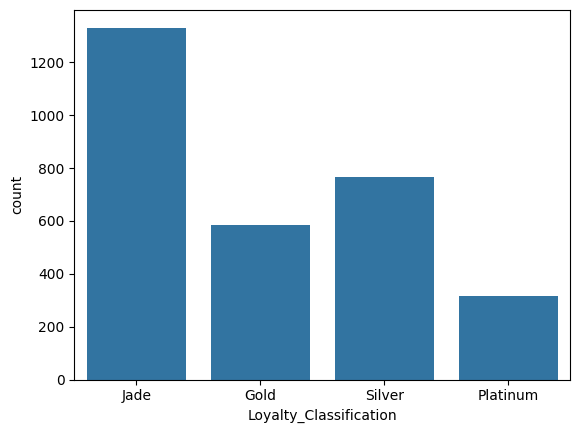

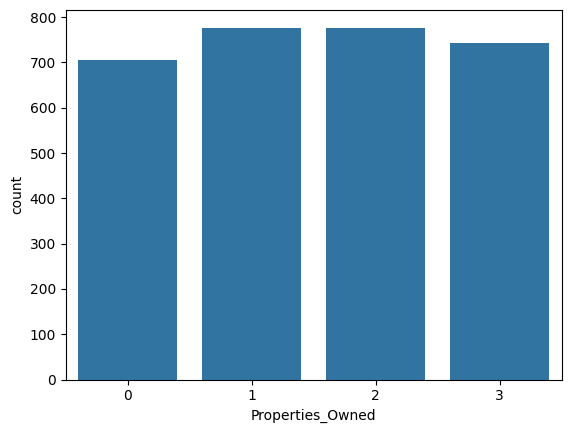

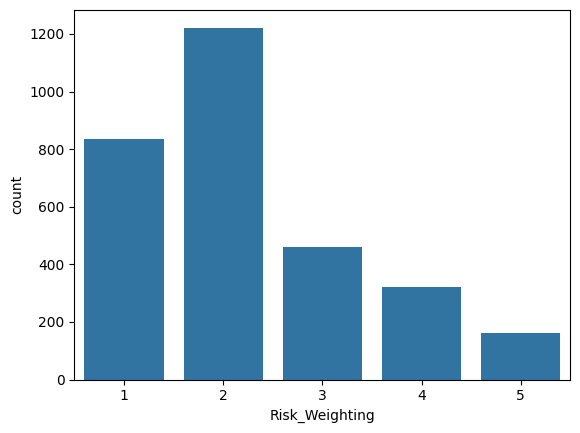

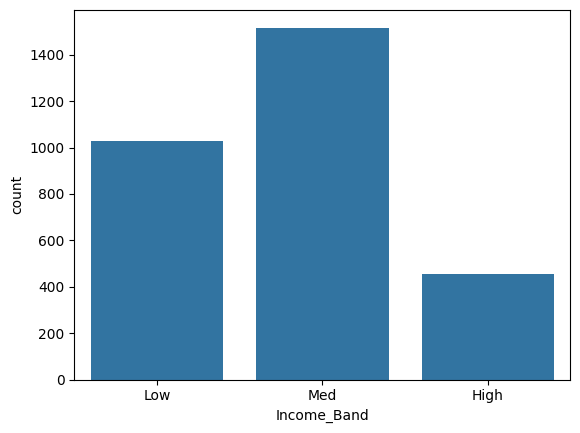

In [18]:
for i, col in enumerate(df[["BRId", "GenderId", "IAId", "credit_cards", "Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification", "Properties_Owned", "Risk_Weighting", "Income_Band"]]):
    plt.figure(i)
    sns.countplot(data=df,x=col)

### Bivariate Analysis

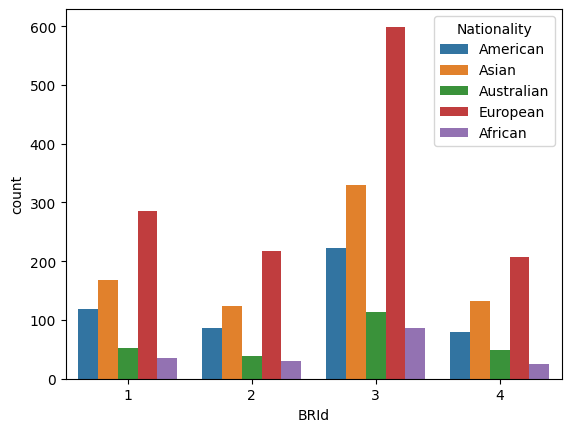

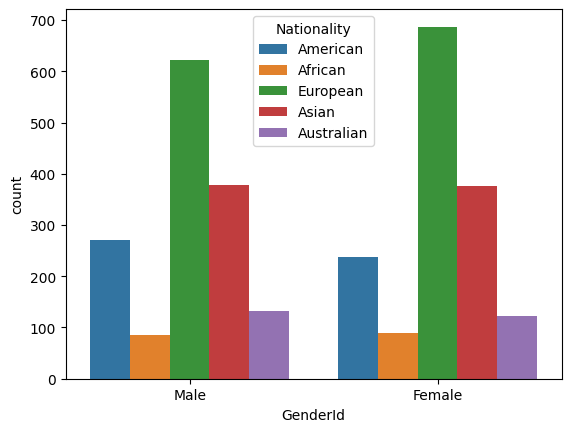

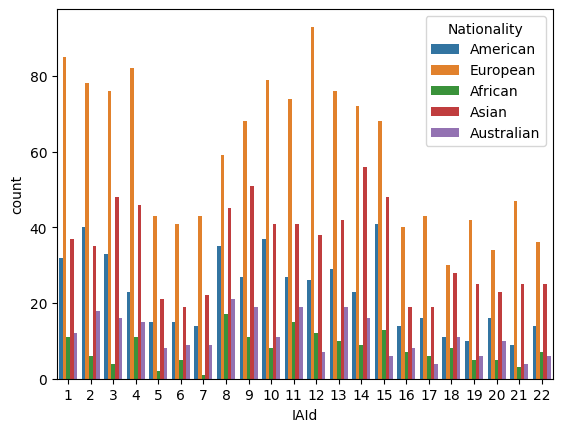

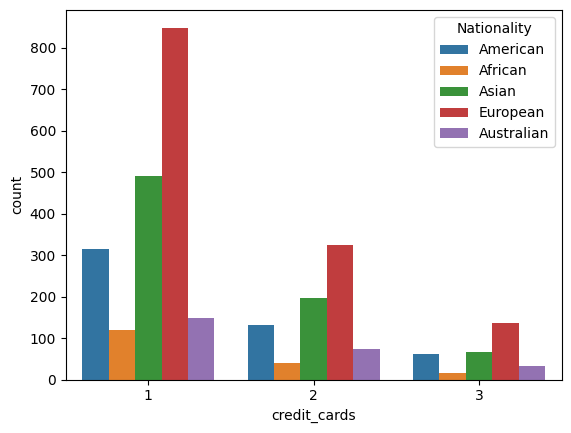

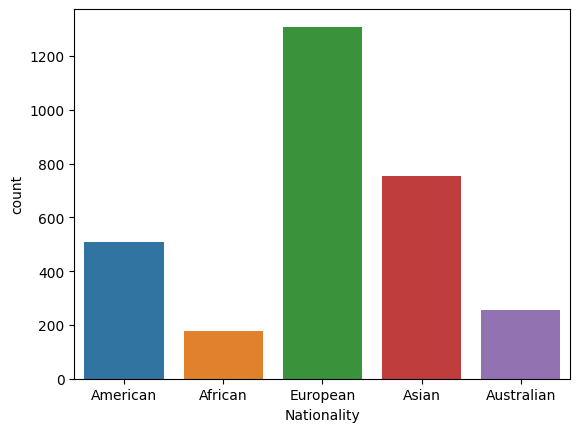

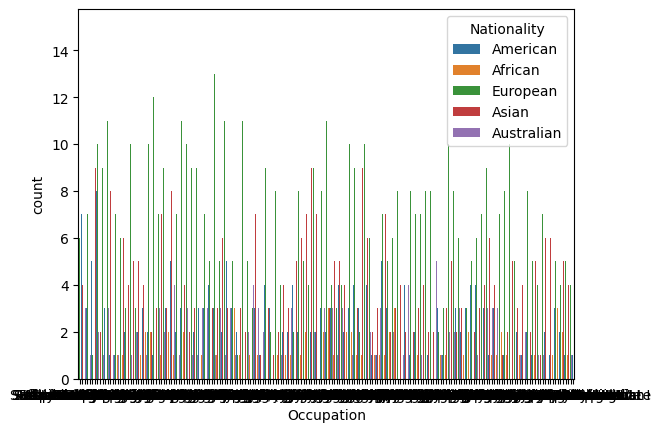

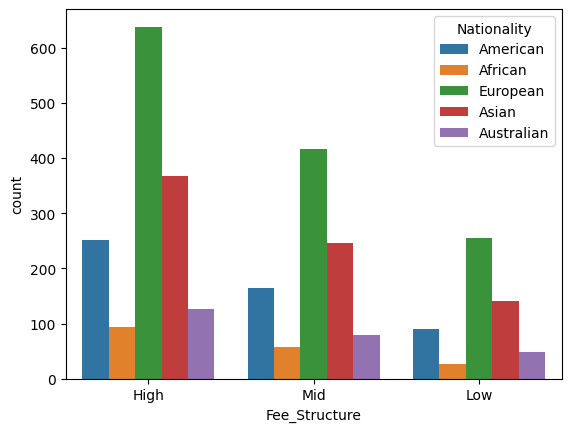

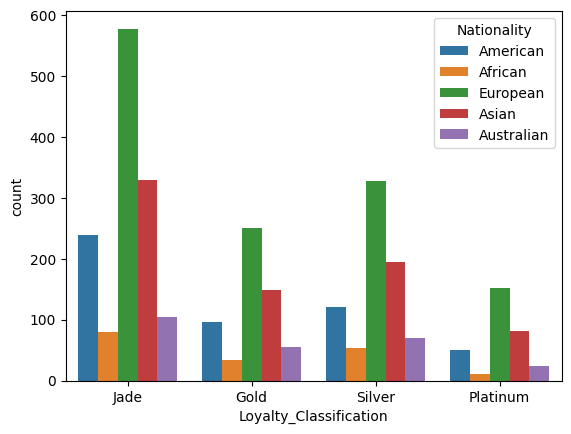

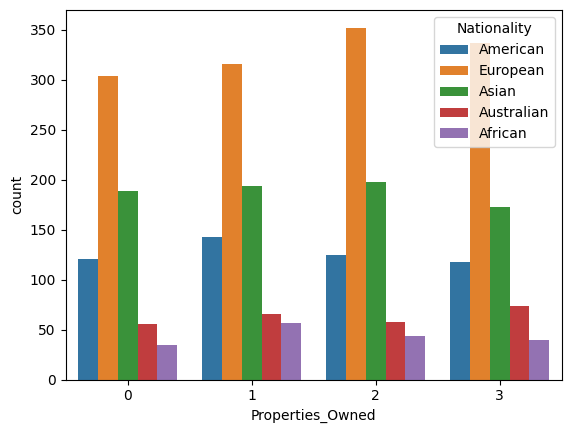

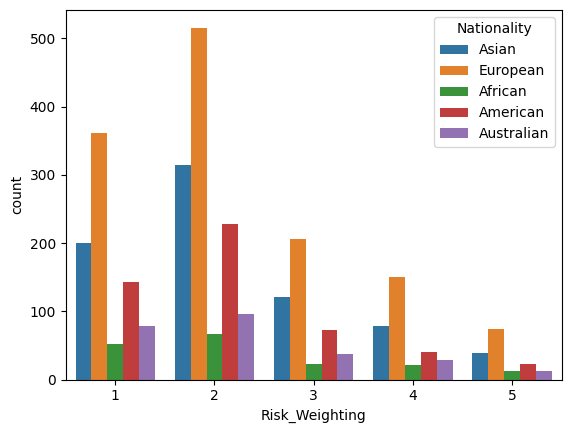

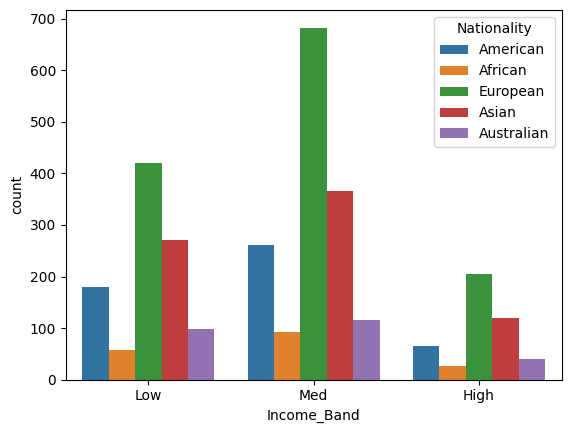

In [ ]:
for i, col in enumerate(df[["BRId", "GenderId", "IAId", "credit_cards", "Nationality", "Occupation", "Fee_Structure", "Loyalty_Classification", "Properties_Owned", "Risk_Weighting", "Income_Band"]]):
    plt.figure(i)
    sns.countplot(data=df, x =col, hue='Nationality')

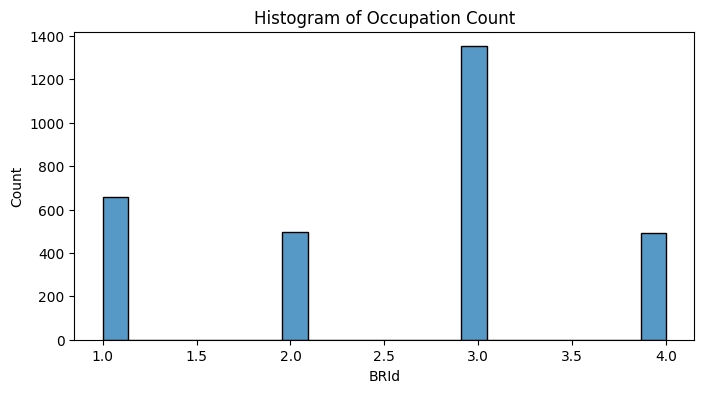

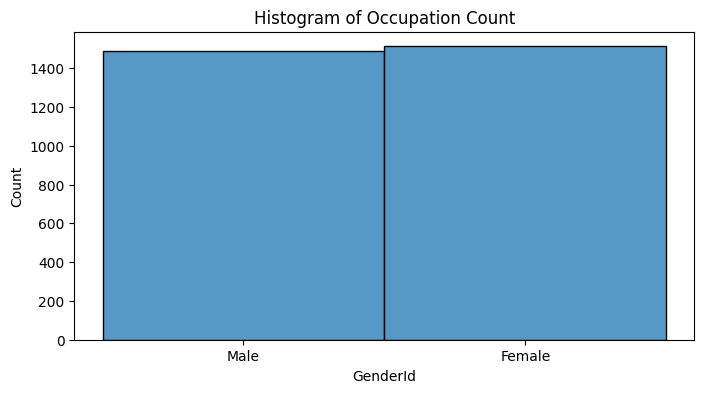

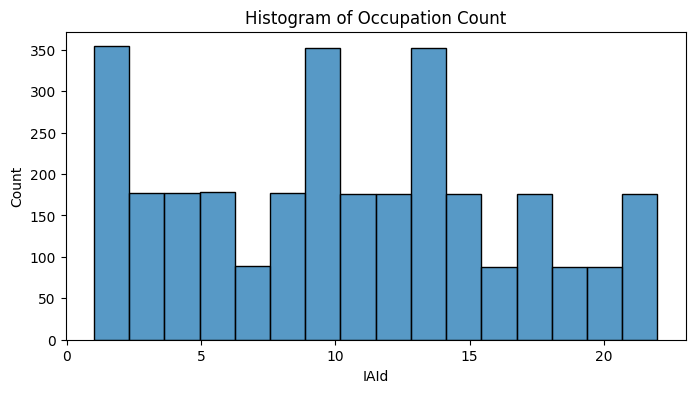

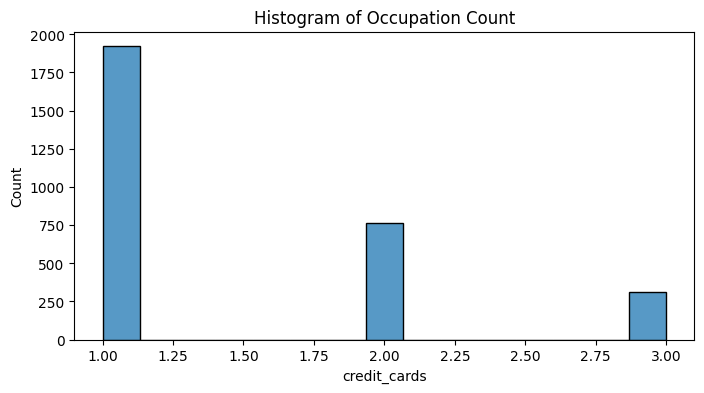

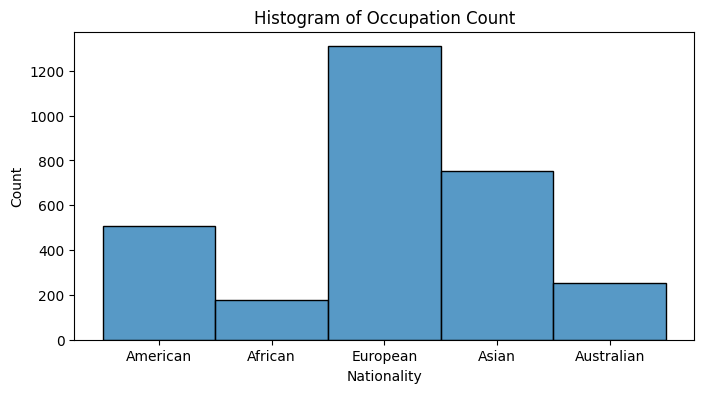

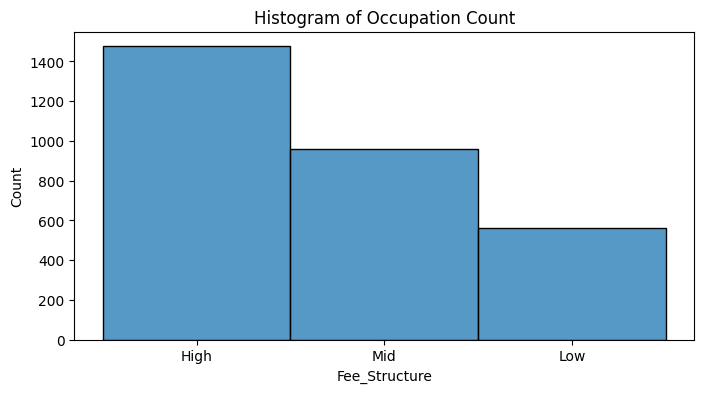

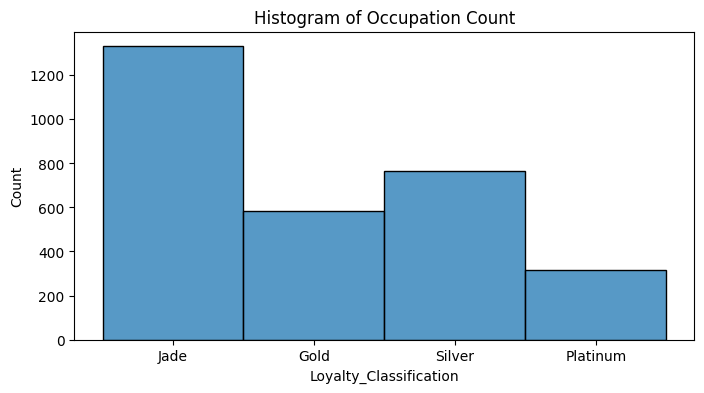

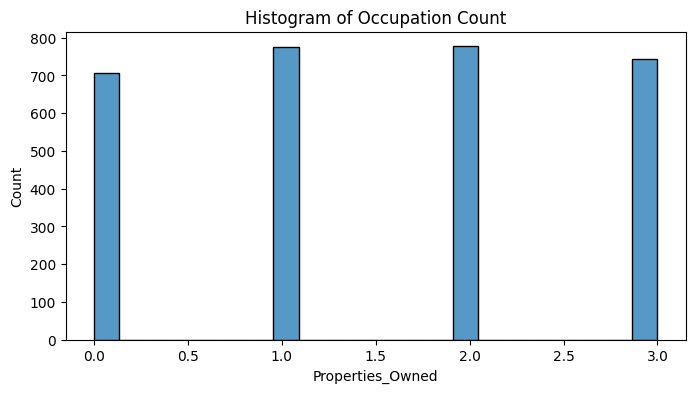

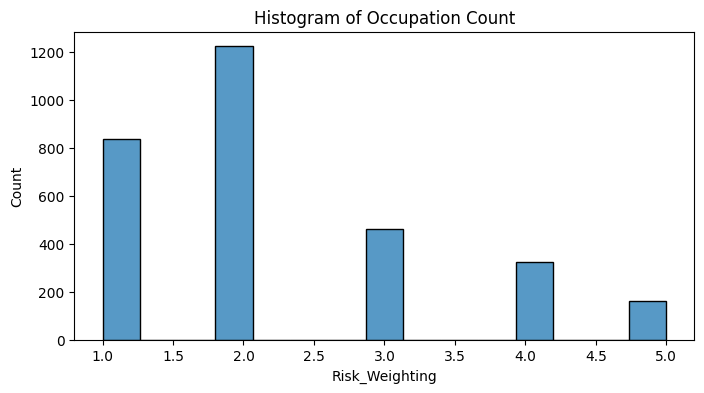

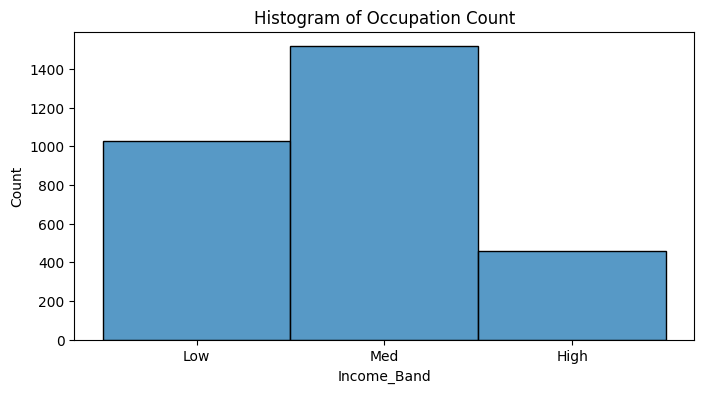

In [24]:
# Histplot of value counts for different occupation

for col in ctg_cols:
  if col == "Occupation":
    continue
  plt.figure(figsize=(8,4))
  sns.histplot(df[col])
  plt.title('Histogram of Occupation Count')
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

## Numerical Analysis

In [25]:
num_cols = ['Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account', 'Business_Lending']

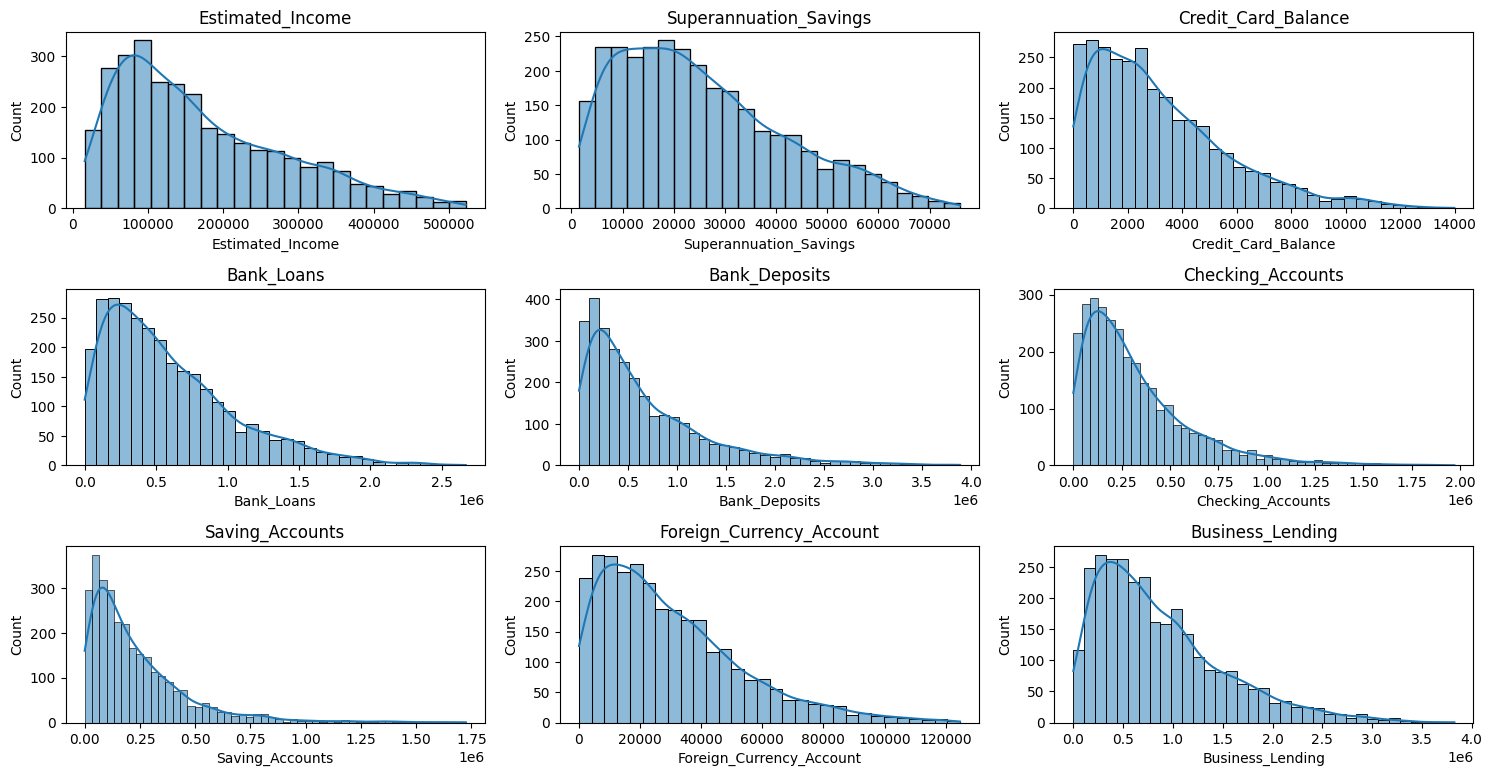

In [27]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Heatmap

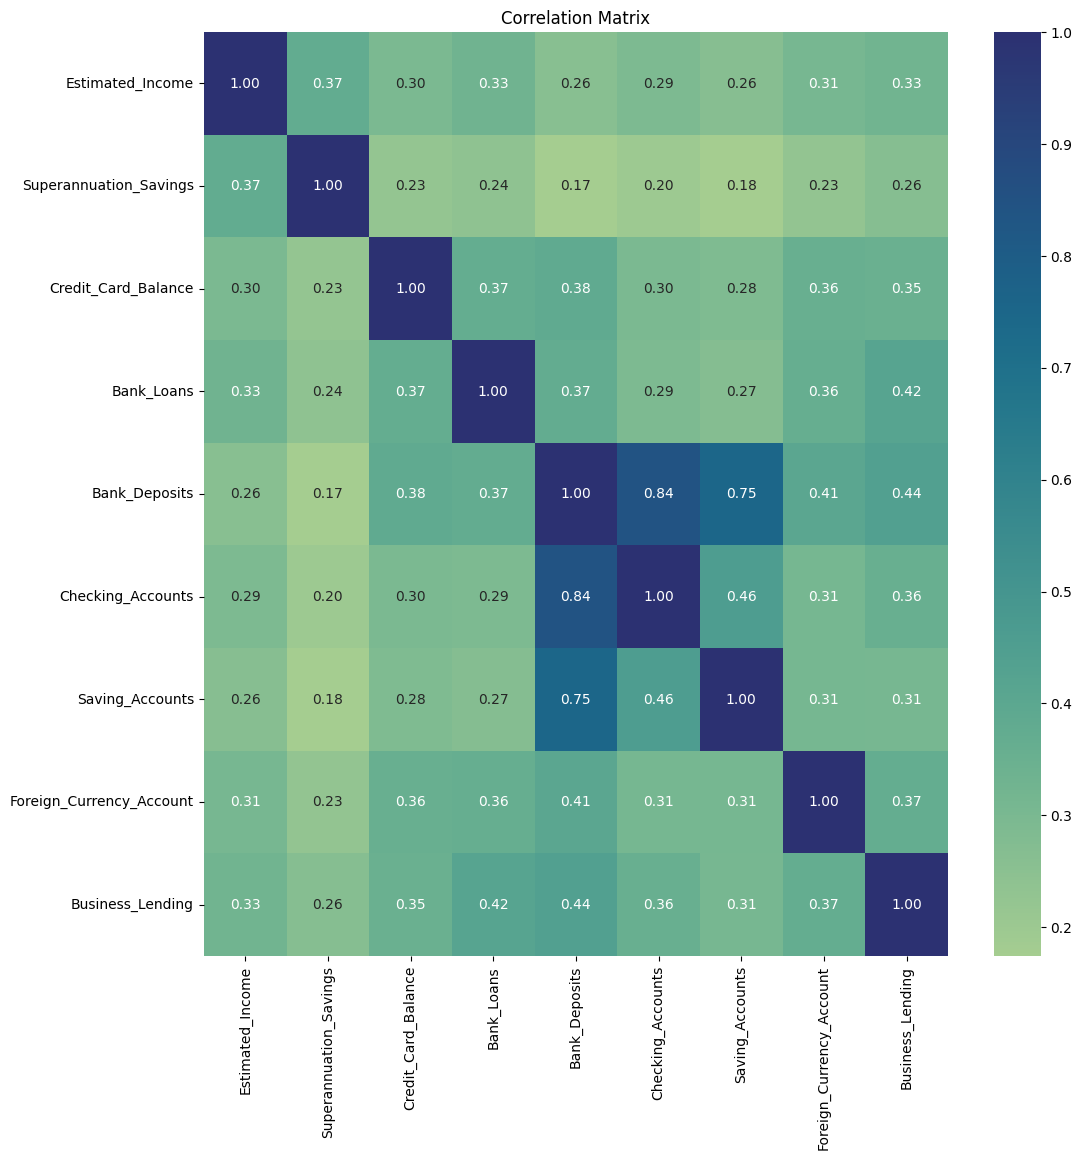

In [28]:
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Insights from EDA:

The strongest positive correlation occur among "Bank Deposits" with "Checking Accounts", "Saving Accounts" and "Foreign Currency Account" indicating that customers who maintain high balances in one account type often hold substantial amount/funds accross other accounts as well.